In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_excel('Final Participant Data Folder/Final_Train.xlsx')
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [3]:
test_data=pd.read_excel('Final Participant Data Folder/Final_Test.xlsx')
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [4]:
print(f'Shape of train_data = {train_data.shape} \nShape of test_data = {test_data.shape}')

Shape of train_data = (5961, 7) 
Shape of test_data = (1987, 6)


Train_data have 7 columns and 5961 rows

Test_data have 7 columns and 1987 rows

#### Checking the datatypes and null values present in  of each column

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


- Only Fees column is in int64 dtype all other columns are in object dtype
- There are null values present in Rating, Place and Miscellaneous_Info columns

In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
Qualification         1987 non-null object
Experience            1987 non-null object
Rating                897 non-null object
Place                 1981 non-null object
Profile               1987 non-null object
Miscellaneous_Info    1153 non-null object
dtypes: object(6)
memory usage: 93.3+ KB


All columns are in object dtype

There are null values in Rating , Place and Miscellaneous_Info columns

- Qualification : Qualification and degrees held by the doctor 
- Experience : Experience of the doctor in number of years 
- Rating : Ratings given by patients 
- Profile : Type of the doctor 
- Miscellaeous_Info : Extra information about the doctor 
- Place : Area and the city where the doctor is located.
- Fees : Fees charged by the doctor. This is the target variable.

#### Checking number of unique values in each columns

In [7]:
train_data.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [8]:
test_data.nunique()

Qualification          630
Experience              57
Rating                  36
Place                  592
Profile                  6
Miscellaneous_Info    1084
dtype: int64

#### HandLing null values

In [9]:
# Let's check the null values of train data.

print(f"---TRAIN DATA--- \n{train_data.isnull().sum()}\n")
print(f"---TEST DATA--- \n{test_data.isnull().sum()}")

---TRAIN DATA--- 
Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

---TEST DATA--- 
Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


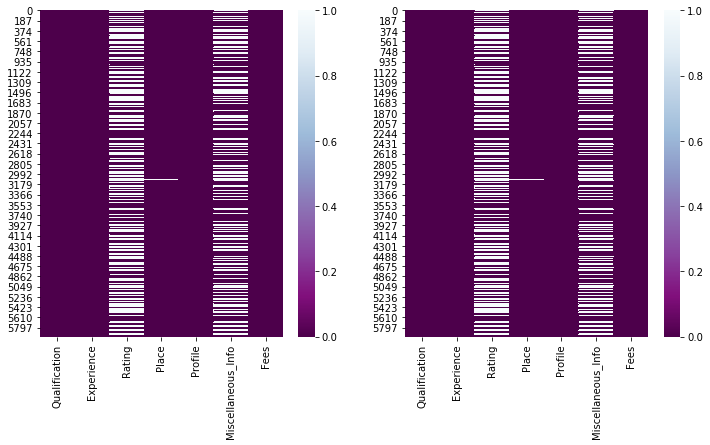

In [10]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.heatmap(train_data.isnull(), cmap = 'BuPu_r')

plt.subplot(1,2,2)
sns.heatmap(train_data.isnull(), cmap = 'BuPu_r')

From the above it is reflecting that 'Rating', 'Places' and 'Miscellaneous_Info' have null value present in the dataset which needs to be filled.

Handling Null values in Rating column

In [11]:
# Removing % from Rating column in train_data and test_data 
train_data.Rating=train_data.Rating.str.rstrip('%')
test_data.Rating=test_data.Rating.str.rstrip('%')

In [12]:
# Converting dtype of Rating column

# train_data
train_ratings=[]
for i,x in enumerate(train_data.Rating):
    try:
        train_data.Rating[i]=int(x)
        train_ratings.append(train_data.Rating[i])
    except:
        pass

# test_data
test_ratings=[]
for i,x in enumerate(test_data.Rating):
    try:
        test_data.Rating[i]=int(x)
        test_ratings.append(test_data.Rating[i])
    except:
        pass

In [13]:
# Converting list into numpy array

train_ratings=np.array(train_ratings)
test_ratings=np.array(test_ratings)

# Calculating mean and median

print(f'train_ratings : mean={train_ratings.mean()}\t median={np.median(train_ratings)}\n')
print(f'test_ratings : mean={test_ratings.mean()}\t median={np.median(test_ratings)}')

train_ratings : mean=94.64347499059797	 median=97.0

test_ratings : mean=94.44147157190635	 median=97.0


In [16]:
# Handling null values in Rating column

# train_data
train_data.Rating.fillna(np.median(train_ratings),inplace=True)

#test_data
test_data.Rating.fillna(np.median(test_ratings),inplace=True)

Handling Null values in Place column

In [17]:
train_data.Place.fillna('Not_Known',inplace=True)

test_data.Place.fillna('Not_known',inplace=True)

In [18]:
# Dropping the Miscellaneous_Info because the info. this column is reflecting does not affects the consulatation fees of the doctor.

train_data.drop(['Miscellaneous_Info'], axis=1, inplace = True)
test_data.drop(['Miscellaneous_Info'], axis=1, inplace = True)

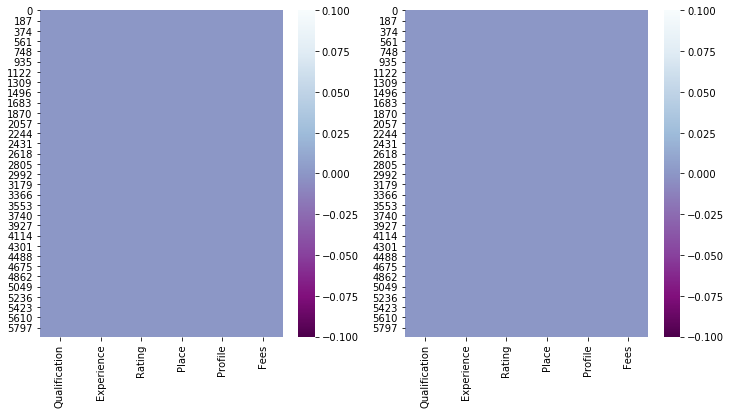

In [19]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.heatmap(train_data.isnull(), cmap = 'BuPu_r')

plt.subplot(1,2,2)
sns.heatmap(train_data.isnull(), cmap = 'BuPu_r')

In [21]:
print(train_data.isnull().values.any())
print(test_data.isnull().values.any())

False
False


All the null values in train_data and test_data have handled successfully..

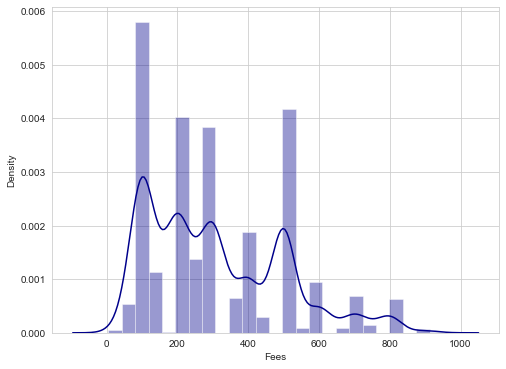

In [22]:
# Visualizing the distribution of target variable.

plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.distplot(train_data['Fees'], color = 'darkblue')

#### Handling the Object dtype 

In [23]:
train_data.dtypes

Qualification     object
Experience        object
Rating           float64
Place             object
Profile           object
Fees               int64
dtype: object

In [24]:
test_data.dtypes

Qualification     object
Experience        object
Rating           float64
Place             object
Profile           object
dtype: object

Both dataset have object dtypes in Qualification, experience, place and profile column

Feature Engineering

In [25]:
# Stripping off or removing the 'years experience' from the 'Experience' e.g. 6 votes stripped off to 6, for training and testing dataset.

# train_data
train_data["Experience"]=train_data["Experience"].str.rstrip('years experience')

# test_data
test_data["Experience"]=test_data["Experience"].str.rstrip('years experience')

In [26]:
# splitting the Place into two diff columns, They are delimited by ','


# For train dataset.
train_data['Area']=train_data.Place.str.split(',').str[0]
train_data['City']=train_data.Place.str.split(',').str[1]

# For test dataset.
test_data['Area']=test_data.Place.str.split(',').str[0]
test_data['City']=test_data.Place.str.split(',').str[1]

In [30]:
train_data.City.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: City, dtype: int64

In [35]:
# Dropping City having value ' Sector 5' 

train_data.drop(train_data[train_data.City==' Sector 5'].index,inplace=True)

###### Checking null values in train_data and test_data

In [36]:
print(train_data.isnull().sum())
print('\n',test_data.isnull().sum())

Qualification     0
Experience        0
Rating            0
Place             0
Profile           0
Fees              0
Area              0
City             26
dtype: int64

 Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Area             0
City             6
dtype: int64


In [37]:
# Handling null values in City

# train_data
train_data.City.fillna('Unknown',inplace=True)

#test_data
test_data.City.fillna('unknown',inplace=True)

#### Converting Object into Numeric Form

In [38]:
# Converting the data type of 'Experience' for both train and test dataset from object to float respectively.

# train_data
train_data["Experience"]=train_data["Experience"].astype('int64')

#test_data
test_data["Experience"]=test_data["Experience"].astype('int64')

In [39]:
# Converting the 'Profile' into numeric by creating dummies.

# train_data
Train_profile=pd.get_dummies(train_data.Profile,drop_first=True)

# test_data
Test_profile=pd.get_dummies(test_data.Profile,drop_first=True)

In [40]:
# Converting the 'City' into numeric by creating dummies.

# train_data
Train_City=pd.get_dummies(train_data.City,drop_first=True)

# test_data
Test_City=pd.get_dummies(test_data.City,drop_first=True)

In [41]:
# Using the LabelEncoder in order to convert the Area and Qualification into numerical format

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

# train_data
train_data.Area=lb.fit_transform(train_data.Area)
train_data.Qualification=lb.fit_transform(train_data.Qualification)

# test_data
test_data.Area=lb.fit_transform(test_data.Area)
test_data.Qualification=lb.fit_transform(test_data.Qualification)

In [42]:
# Let's now concat the dummie variables with numerical data and the columns whose dtypes has been changed and making a dataset with all valus being numerical in nature.

# train_data
train_data=pd.concat([train_data,Train_profile,Train_City],axis=1)

# test_data
test_data=pd.concat([test_data,Test_profile,Test_City],axis=1)

In [44]:
pd.options.display.max_columns=None

In [45]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Area,City,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,Unknown
0,401,24,100.0,"Kakkanad, Ernakulam",Homeopath,100,296,Ernakulam,0,0,0,0,1,0,0,0,1,0,0,0,0
1,73,12,98.0,"Whitefield, Bangalore",Ayurveda,350,856,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1135,9,97.0,"Mathikere - BEL, Bangalore",ENT Specialist,300,452,Bangalore,0,0,1,0,0,0,0,0,0,0,0,0,0
3,464,12,97.0,"Bannerghatta Road, Bangalore",Ayurveda,250,68,Bangalore,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10,20,100.0,"Keelkattalai, Chennai",Ayurveda,250,335,Chennai,0,0,0,0,0,1,0,0,0,0,0,0,0


In [46]:
train_data.shape

(5960, 21)

In [47]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Area,City,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
0,241,35,97.0,"Ghatkopar East, Mumbai",General Medicine,142,Mumbai,0,0,0,1,0,0,0,0,0,0,1,0,0
1,340,31,97.0,"West Marredpally, Hyderabad",ENT Specialist,578,Hyderabad,0,0,1,0,0,0,0,0,0,1,0,0,0
2,258,40,70.0,"KK Nagar, Chennai",Dermatologists,212,Chennai,0,1,0,0,0,1,0,0,0,0,0,0,0
3,6,0,97.0,"New Ashok Nagar, Delhi",Ayurveda,373,Delhi,0,0,0,0,0,0,0,1,0,0,0,0,0
4,79,16,100.0,"Kanakpura Road, Bangalore",Dentist,231,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
test_data.shape

(1987, 20)

In [49]:
# Dropping Place,Profile and City columns

# train_data
train_data.drop(columns=['Place','City','Profile'],inplace=True)

# test_data
test_data.drop(columns=['Place','City','Profile'],inplace=True)

Checking Data Types 

In [50]:
train_data.dtypes

Qualification            int32
Experience               int64
Rating                 float64
Fees                     int64
Area                     int32
Dentist                  uint8
Dermatologists           uint8
ENT Specialist           uint8
General Medicine         uint8
Homeopath                uint8
 Chennai                 uint8
 Coimbatore              uint8
 Delhi                   uint8
 Ernakulam               uint8
 Hyderabad               uint8
 Mumbai                  uint8
 Thiruvananthapuram      uint8
Unknown                  uint8
dtype: object

In [51]:
test_data.dtypes

Qualification            int32
Experience               int64
Rating                 float64
Area                     int32
Dentist                  uint8
Dermatologists           uint8
ENT Specialist           uint8
General Medicine         uint8
Homeopath                uint8
 Chennai                 uint8
 Coimbatore              uint8
 Delhi                   uint8
 Ernakulam               uint8
 Hyderabad               uint8
 Mumbai                  uint8
 Thiruvananthapuram      uint8
unknown                  uint8
dtype: object

#### Statistical Summary

In [52]:
train_data.describe()

,Qualification,Experience,Rating,Fees,Area,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,Unknown
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,596.935235,17.305034,95.948658,307.954362,411.814933,0.234228,0.173490,0.122148,0.196812,0.141443,0.143456,0.038255,0.198658,0.025671,0.159564,0.204530,0.014430,0.004362
std,413.833727,11.143434,5.373892,190.934916,255.424691,0.423551,0.378702,0.327484,0.397622,0.348507,0.350567,0.191827,0.399023,0.158166,0.366232,0.403392,0.119263,0.065910
min,0.000000,0.000000,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,219.000000,9.000000,97.000000,150.000000,195.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,596.000000,14.000000,97.000000,300.000000,409.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,943.000000,23.000000,97.000000,500.000000,623.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1419.000000,66.000000,100.000000,950.000000,866.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
test_data.describe()

,Qualification,Experience,Rating,Area,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,unknown
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,259.979869,17.874685,95.844992,289.648213,0.221943,0.170609,0.118269,0.223452,0.139406,0.144439,0.035229,0.209864,0.024157,0.167589,0.195773,0.008556,0.003020
std,185.961177,11.366764,5.246600,173.263142,0.415657,0.376262,0.323007,0.416664,0.346457,0.351623,0.184405,0.407314,0.153575,0.373595,0.396894,0.092123,0.054882
min,0.000000,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,9.000000,97.000000,138.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,241.000000,15.000000,97.000000,294.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,417.000000,24.000000,97.000000,439.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,629.000000,65.000000,100.000000,589.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Handling Outliers and Skewness

Train Data

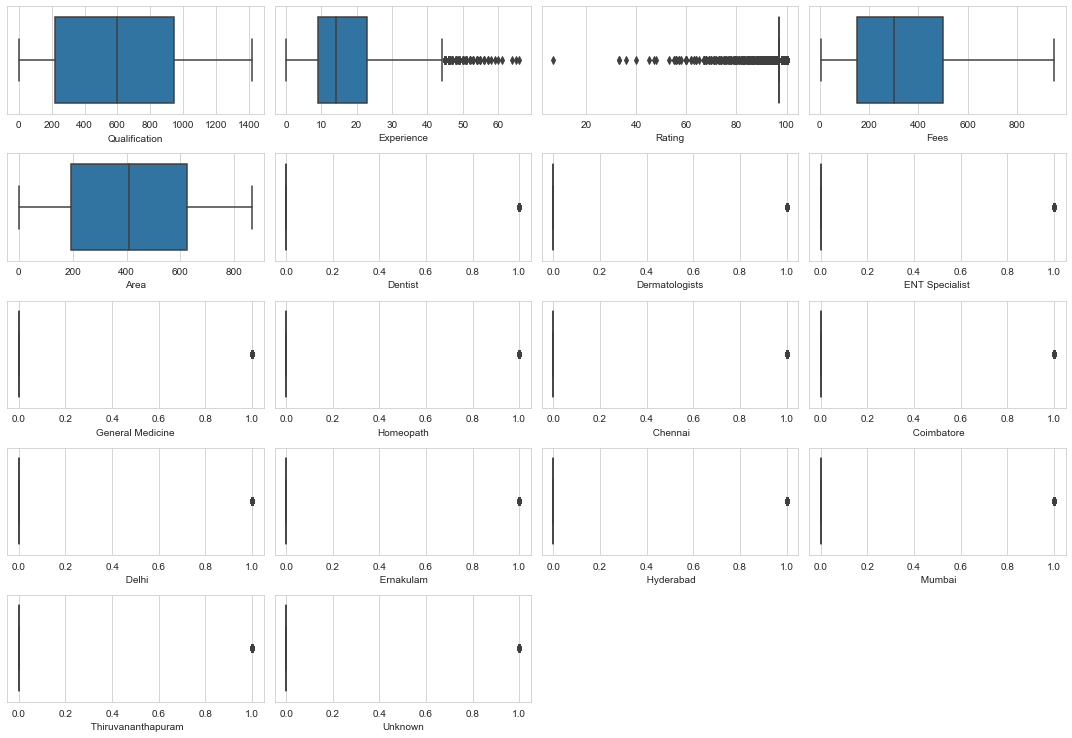

In [58]:
plt.figure(figsize=(15,12))

for x,col in enumerate(train_data.columns):
    
    plt.subplot(6,4,x+1)
    sns.boxplot(train_data[col])
    plt.tight_layout()

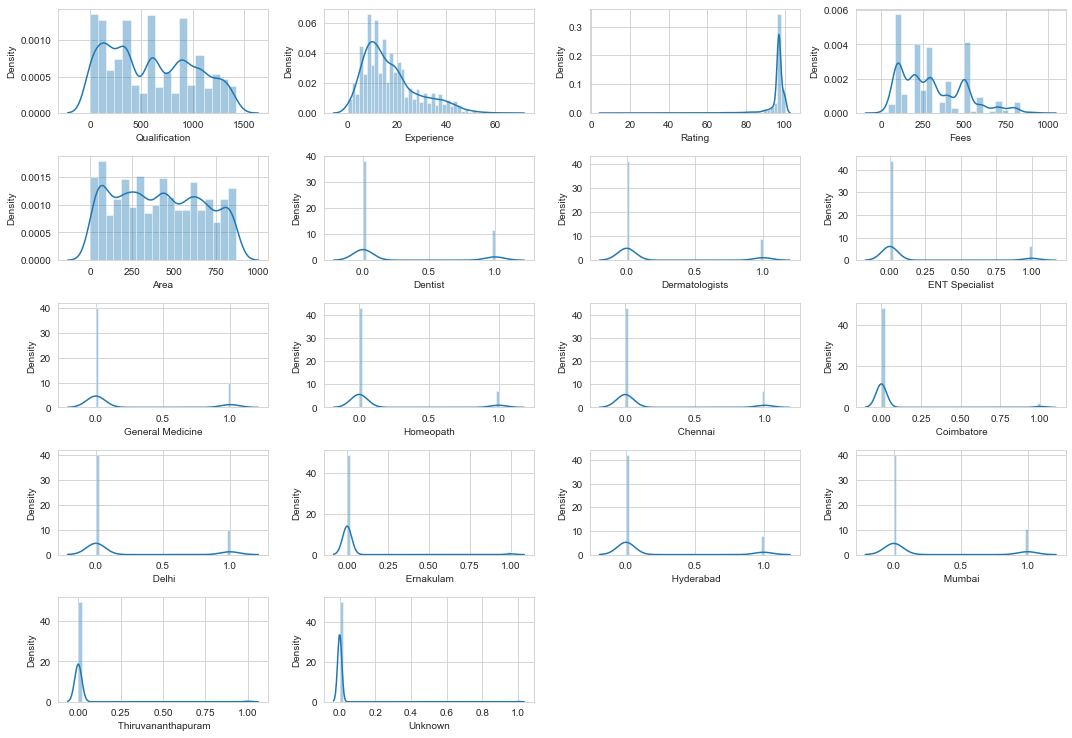

In [59]:
plt.figure(figsize=(15,12))

for x,col in enumerate(train_data.columns):
    
    plt.subplot(6,4,x+1)
    sns.distplot(train_data[col])
    plt.tight_layout()

In [60]:
# Checking skewness of data

train_data.skew()

Qualification           0.239447
Experience              0.990832
Rating                 -5.256761
Fees                    0.751676
Area                    0.109198
Dentist                 1.255391
Dermatologists          1.724943
ENT Specialist          2.308384
General Medicine        1.525516
Homeopath               2.058365
 Chennai                2.034779
 Coimbatore             4.815787
 Delhi                  1.510907
 Ernakulam              5.999893
 Hyderabad              1.859754
 Mumbai                 1.465419
 Thiruvananthapuram     8.145573
Unknown                15.044902
dtype: float64

In [61]:
# Handling Outliers

from scipy.stats import zscore

z = np.abs(zscore(train_data))
print(train_data.shape)

# Removing the outliers.

train_data = train_data.loc[(z<3).all(axis=1)]
print(train_data.shape)

(5960, 18)
(5281, 18)


679 rows have been removed as outlier

In [63]:
# Treating the skewness with sqrt function.

for col in train_data.columns:
    if train_data.skew().loc[col]>0.55:
        train_data[col]=np.sqrt(train_data[col])

Test Data

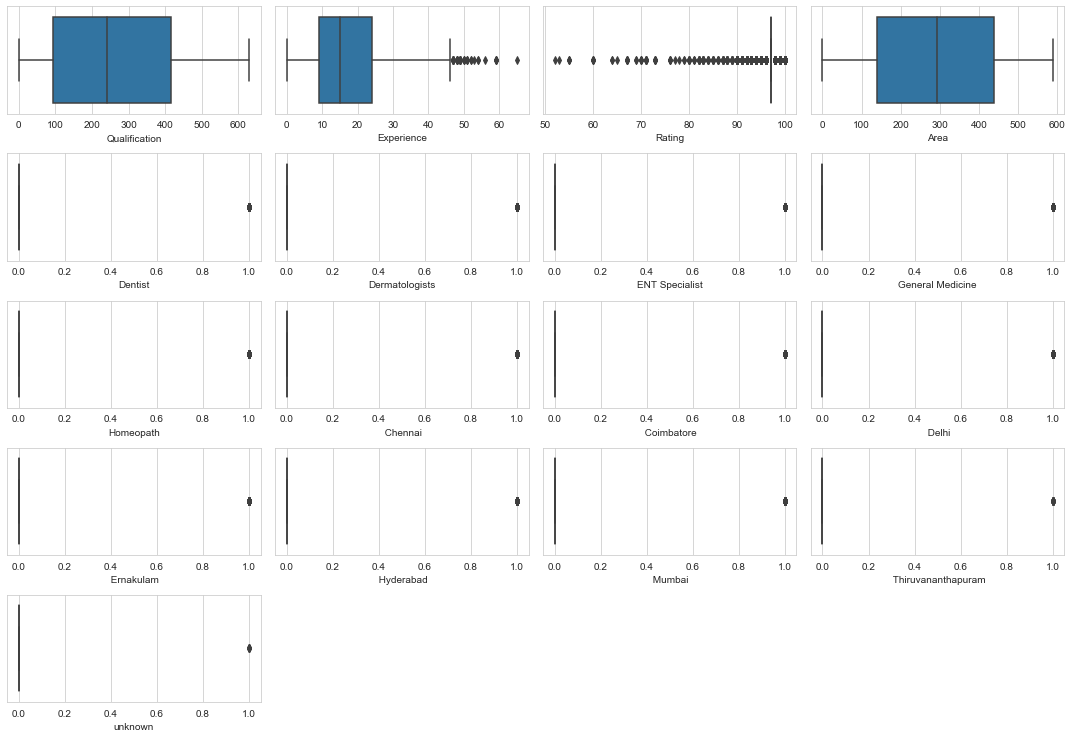

In [65]:
plt.figure(figsize=(15,12))

for x,col in enumerate(test_data.columns):
    
    plt.subplot(6,4,x+1)
    sns.boxplot(test_data[col])
    plt.tight_layout()

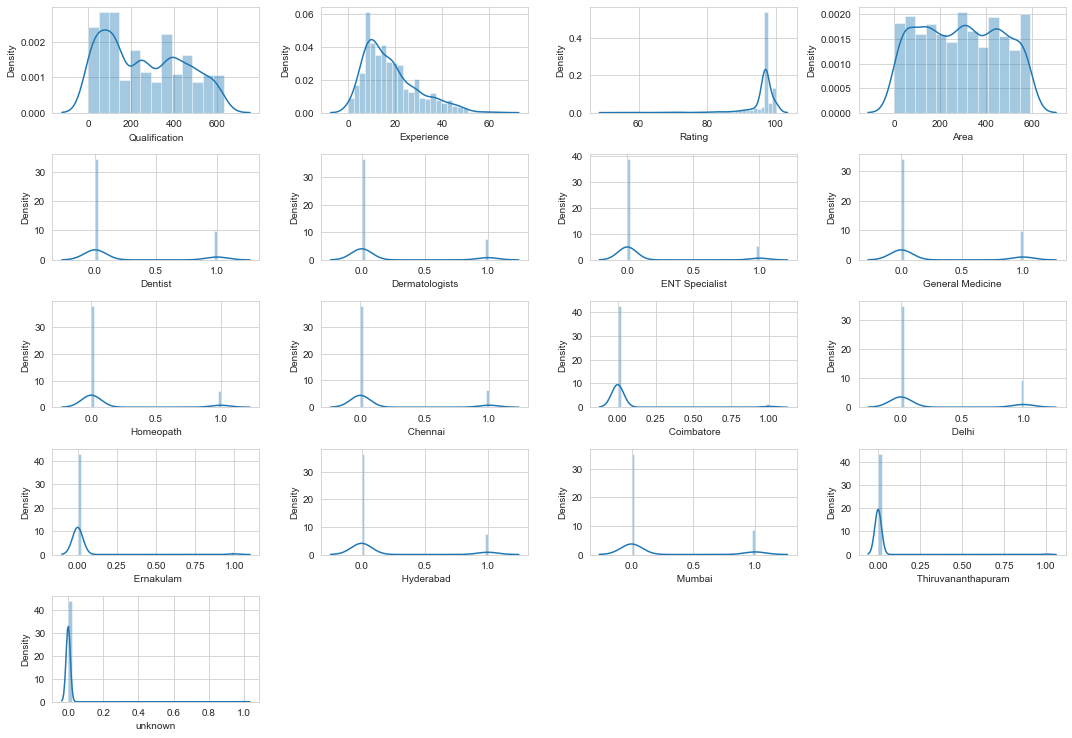

In [66]:
plt.figure(figsize=(15,12))

for x,col in enumerate(test_data.columns):
    
    plt.subplot(6,4,x+1)
    sns.distplot(test_data[col])
    plt.tight_layout()

In [67]:
# Checking skewness of data

test_data.skew()

Qualification           0.280822
Experience              0.963447
Rating                 -4.235921
Area                    0.036663
Dentist                 1.339264
Dermatologists          1.752626
ENT Specialist          2.365989
General Medicine        1.328775
Homeopath               2.083705
 Chennai                2.024439
 Coimbatore             5.045856
 Delhi                  1.426066
 Ernakulam              6.203118
 Hyderabad              1.781316
 Mumbai                 1.534586
 Thiruvananthapuram    10.680036
unknown                18.129143
dtype: float64

In [68]:
# Handling Outliers

from scipy.stats import zscore

z = np.abs(zscore(test_data))
print(test_data.shape)

# Removing the outliers.

test_data = test_data.loc[(z<3).all(axis=1)]
print(test_data.shape)

(1987, 17)
(1788, 17)


199 rows has been removed as outliers

In [70]:
# Treating the skewness with sqrt function.

for col in test_data.columns:
    if test_data.skew().loc[col]>0.55:
        test_data[col]=np.sqrt(test_data[col])

The cleaning of the data is done. So now, let's move further and do the testing and training of data by splitting the target and rest variables and selecting the best model through various algorithms and evaluation can be done

#### Splitting Data into Input and output

In [72]:
xdata=train_data.drop(columns=['Fees'])
print(xdata.shape)
ydata=train_data[['Fees']]
print(ydata.shape)

(5281, 17)
(5281, 1)


#### Scaling the Input data

In [73]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

xdata=pd.DataFrame(std.fit_transform(xdata),columns=xdata.columns)
xdata.head()

,Qualification,Experience,Rating,Area,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath,Chennai,Coimbatore,Delhi,Ernakulam,Hyderabad,Mumbai,Thiruvananthapuram,Unknown
0,-1.267191,-0.353324,0.471890,1.764210,-0.52175,-0.461419,-0.375630,-0.485695,-0.425948,-0.433678,0.0,-0.522044,0.0,-0.460211,-0.53758,0.0,0.0
1,1.292568,-0.714088,0.145620,0.188695,-0.52175,-0.461419,2.662196,-0.485695,-0.425948,-0.433678,0.0,-0.522044,0.0,-0.460211,-0.53758,0.0,0.0
2,-0.324756,-0.353324,0.145620,-1.308825,-0.52175,-0.461419,-0.375630,-0.485695,-0.425948,-0.433678,0.0,-0.522044,0.0,-0.460211,-0.53758,0.0,0.0
3,-1.419041,0.430260,1.124431,-0.267581,-0.52175,-0.461419,-0.375630,-0.485695,-0.425948,2.305859,0.0,-0.522044,0.0,-0.460211,-0.53758,0.0,0.0
4,-1.419041,-0.847458,0.145620,0.785363,-0.52175,-0.461419,-0.375630,-0.485695,-0.425948,2.305859,0.0,-0.522044,0.0,-0.460211,-0.53758,0.0,0.0


#### Training and Testing Model

In [76]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [75]:
# Splitting the training and testing data and finding the maximum r2 score at random state.

def max_r2_score (reg, X, y):
    max_r_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        r2_scr = r2_score(y_test, pred)
        if r2_scr > max_r_scr:
            max_r_scr = r2_scr
            final_r_state = r_state
            
    print("Maximum r2 score :", max_r_scr, "achieved at", final_r_state)
    print('\n')
    print ("Train acc",reg.score(X_train,y_train))
    print('\n')
    print("Mean Absolute Error : ",np.sqrt(mean_absolute_error(y_test, pred)))
    print('\n')
    print("RMSE : ",np.sqrt(mean_squared_error(y_test, pred)))

In [77]:
models={'LinearRegression':LinearRegression(),'Lasso':Lasso(alpha=0.0001),
       'Ridge':Ridge(alpha=1),'SVR':SVR(),
       'KNeighborsRegressor':KNeighborsRegressor(),
       'RandomForestRegressor':RandomForestRegressor(),
       'AdaBoostRegressor':AdaBoostRegressor(),
       'GradientBoostingRegressor':GradientBoostingRegressor(),
       'ExtraTreesRegressor':ExtraTreesRegressor()}

In [79]:
for name in models:
    model=models[name]
    print('--------',name,'--------')
    r_state = max_r2_score(model, xdata, ydata)
    print('\n')
    mR2 = cross_val_score(model,  xdata, ydata, cv=5, scoring = "r2").mean()
    print('Cross validation score (Mean r2 score):', mR2,'\n')
    stdR2 = cross_val_score(model,  xdata, ydata, cv=5, scoring = "r2").std()
    print('Standard Deviationin r2 score :', stdR2)
    print('\n')
    print('\n')

-------- LinearRegression --------
Maximum r2 score : 0.14257023596109286 achieved at 74


Train acc 0.11793041001188076


Mean Absolute Error :  1.9973643596470514


RMSE :  4.927306843398362


Cross validation score (Mean r2 score): 0.11181091299798156 

Standard Deviationin r2 score : 0.013669849179359688




-------- Lasso --------
Maximum r2 score : 0.14255845957715818 achieved at 74


Train acc 0.11793039424693308


Mean Absolute Error :  1.9973793526054702


RMSE :  4.927353622758336


Cross validation score (Mean r2 score): 0.11181114879932527 

Standard Deviationin r2 score : 0.013673065005968783




-------- Ridge --------
Maximum r2 score : 0.14255605808746707 achieved at 74


Train acc 0.11793037461524182


Mean Absolute Error :  1.9973898323165822


RMSE :  4.927380212083927


Cross validation score (Mean r2 score): 0.11181380720973141 

Standard Deviationin r2 score : 0.01367212206834851




-------- SVR --------
Maximum r2 score : 0.1845593355858487 achieved at 69


Trai

ExtraTreesRegressor perform well in this dataset

Checking Test_data

In [80]:
model=ExtraTreesRegressor()

In [81]:
model.fit(xdata,ydata)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [82]:
pred=model.predict(test_data)

In [83]:
Output=pd.DataFrame({'Fees':pred})
Output.head()

,Fees
0,17.852761
1,15.964018
2,17.544700
3,17.841426
4,17.413579


In [85]:
Output.to_csv('Doctor_Fee.csv',index=False)

In [86]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(model, 'doc_fees.pkl')

['doc_fees.pkl']